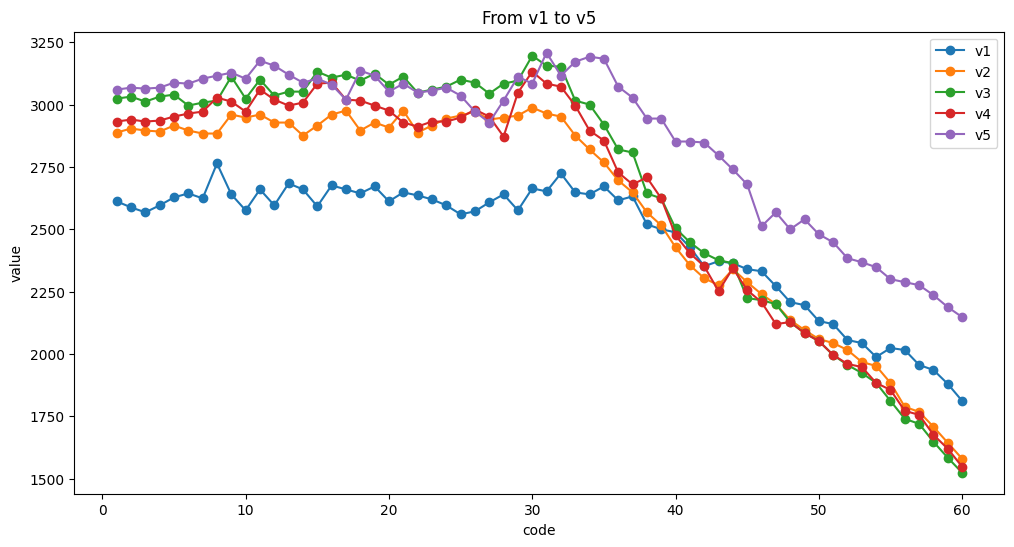

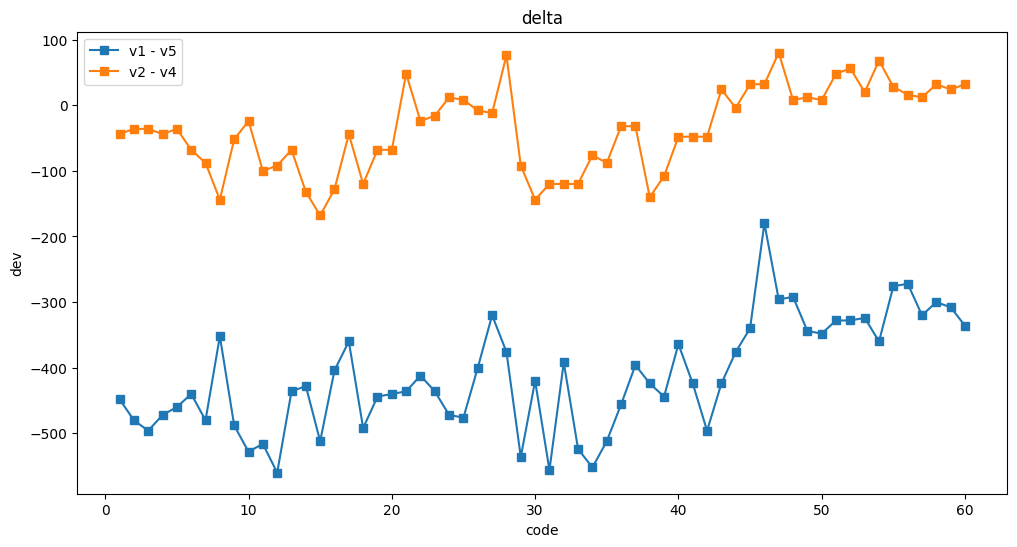

In [4]:
import re
import matplotlib.pyplot as plt

# 数据字符串
data = """
Exporting EEPROM Data:
v1: 2612v2: 2888v3: 3024v4: 2932v5: 3060
v1: 2588v2: 2904v3: 3032v4: 2940v5: 3068
v1: 2568v2: 2896v3: 3012v4: 2932v5: 3064
v1: 2596v2: 2892v3: 3032v4: 2936v5: 3068
v1: 2628v2: 2916v3: 3040v4: 2952v5: 3088
v1: 2644v2: 2896v3: 2996v4: 2964v5: 3084
v1: 2624v2: 2884v3: 3008v4: 2972v5: 3104
v1: 2764v2: 2884v3: 3016v4: 3028v5: 3116
v1: 2640v2: 2960v3: 3112v4: 3012v5: 3128
v1: 2576v2: 2948v3: 3024v4: 2972v5: 3104
v1: 2660v2: 2960v3: 3100v4: 3060v5: 3176
v1: 2596v2: 2928v3: 3036v4: 3020v5: 3156
v1: 2684v2: 2928v3: 3052v4: 2996v5: 3120
v1: 2660v2: 2876v3: 3052v4: 3008v5: 3088
v1: 2592v2: 2916v3: 3132v4: 3084v5: 3104
v1: 2676v2: 2960v3: 3108v4: 3088v5: 3080
v1: 2660v2: 2976v3: 3120v4: 3020v5: 3020
v1: 2644v2: 2896v3: 3096v4: 3016v5: 3136
v1: 2672v2: 2928v3: 3124v4: 2996v5: 3116
v1: 2612v2: 2908v3: 3080v4: 2976v5: 3052
v1: 2648v2: 2976v3: 3112v4: 2928v5: 3084
v1: 2636v2: 2888v3: 3048v4: 2912v5: 3048
v1: 2620v2: 2916v3: 3060v4: 2932v5: 3056
v1: 2596v2: 2944v3: 3072v4: 2932v5: 3068
v1: 2560v2: 2956v3: 3100v4: 2948v5: 3036
v1: 2572v2: 2972v3: 3088v4: 2980v5: 2972
v1: 2608v2: 2940v3: 3044v4: 2952v5: 2928
v1: 2640v2: 2948v3: 3084v4: 2872v5: 3016
v1: 2576v2: 2956v3: 3096v4: 3048v5: 3112
v1: 2664v2: 2988v3: 3196v4: 3132v5: 3084
v1: 2652v2: 2964v3: 3156v4: 3084v5: 3208
v1: 2724v2: 2952v3: 3152v4: 3072v5: 3116
v1: 2648v2: 2876v3: 3016v4: 2996v5: 3172
v1: 2640v2: 2820v3: 3000v4: 2896v5: 3192
v1: 2672v2: 2768v3: 2920v4: 2856v5: 3184
v1: 2616v2: 2696v3: 2820v4: 2728v5: 3072
v1: 2632v2: 2648v3: 2808v4: 2680v5: 3028
v1: 2520v2: 2568v3: 2644v4: 2708v5: 2944
v1: 2500v2: 2516v3: 2624v4: 2624v5: 2944
v1: 2488v2: 2428v3: 2504v4: 2476v5: 2852
v1: 2428v2: 2356v3: 2448v4: 2404v5: 2852
v1: 2352v2: 2304v3: 2404v4: 2352v5: 2848
v1: 2372v2: 2276v3: 2376v4: 2252v5: 2796
v1: 2364v2: 2340v3: 2364v4: 2344v5: 2740
v1: 2340v2: 2288v3: 2224v4: 2256v5: 2680
v1: 2332v2: 2240v3: 2216v4: 2208v5: 2512
v1: 2272v2: 2200v3: 2200v4: 2120v5: 2568
v1: 2208v2: 2136v3: 2128v4: 2128v5: 2500
v1: 2196v2: 2096v3: 2084v4: 2084v5: 2540
v1: 2132v2: 2060v3: 2052v4: 2052v5: 2480
v1: 2120v2: 2044v3: 1996v4: 1996v5: 2448
v1: 2056v2: 2016v3: 1956v4: 1960v5: 2384
v1: 2044v2: 1968v3: 1924v4: 1948v5: 2368
v1: 1988v2: 1952v3: 1884v4: 1884v5: 2348
v1: 2024v2: 1884v3: 1812v4: 1856v5: 2300
v1: 2016v2: 1788v3: 1740v4: 1772v5: 2288
v1: 1956v2: 1768v3: 1720v4: 1756v5: 2276
v1: 1936v2: 1708v3: 1648v4: 1676v5: 2236
v1: 1880v2: 1644v3: 1584v4: 1620v5: 2188
v1: 1812v2: 1580v3: 1524v4: 1548v5: 2148
"""

# 如果第一行是标题，跳过它
if 'Exporting EEPROM Data' in lines[0]:
    lines = lines[1:]

# 初始化列表来存储v1到v5的值
v1_list = []
v2_list = []
v3_list = []
v4_list = []
v5_list = []

# 解析每一行，提取数字
for line in lines:
    nums = re.findall(r'v\d+:\s*(\d+)', line)
    nums = [int(num) for num in nums]
    if len(nums) == 5:
        v1_list.append(nums[0])
        v2_list.append(nums[1])
        v3_list.append(nums[2])
        v4_list.append(nums[3])
        v5_list.append(nums[4])
    else:
        print("行格式不正确，未能提取5个数字：", line)

# 计算差值
v1_v5_diff = [v1 - v5 for v1, v5 in zip(v1_list, v5_list)]
v2_v4_diff = [v2 - v4 for v2, v4 in zip(v2_list, v4_list)]

# 样本编号
x = range(1, len(v1_list) + 1)

# 绘制v1到v5的变化
plt.figure(figsize=(12, 6))  # 调整宽度
plt.plot(x, v1_list, label='v1', marker='o')
plt.plot(x, v2_list, label='v2', marker='o')
plt.plot(x, v3_list, label='v3', marker='o')
plt.plot(x, v4_list, label='v4', marker='o')
plt.plot(x, v5_list, label='v5', marker='o')
plt.xlabel('code')
plt.ylabel('value')
plt.title('From v1 to v5')
plt.legend()
plt.show()

# 绘制差值
plt.figure(figsize=(12, 6))  # 调整宽度
plt.plot(x, v1_v5_diff, label='v1 - v5', marker='s')
plt.plot(x, v2_v4_diff, label='v2 - v4', marker='s')
plt.xlabel('code')
plt.ylabel('dev')
plt.title('delta')
plt.legend()
plt.show()